# Task 7: Basic Sales Summary using SQLite + Python

Objective:
- Connect to a SQLite database
- Run SQL query to get total quantity and revenue per product
- Display results and plot a bar chart

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

Code: Create database and insert sample data

In [3]:
conn = sqlite3.connect("Sale_data.db")
cursor = conn.cursor()

In [8]:
## Create a table
cursor.execute("""
CREATE TABLE  IF NOT EXISTS sales(
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  product VARCHAR(100),
  quantity INTEGER,
  price REAL
)
"""
)

In [10]:
### INSERT VALUES IN A TABLE
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    cursor.executemany("""
        INSERT INTO sales (product, quantity, price)
        VALUES (?, ?, ?)
    """, [
        ("Laptop", 3, 65000),
        ("Laptop", 1, 65000),
        ("Mouse", 10, 500),
        ("Mouse", 5, 500),
        ("Keyboard", 4, 1500),
        ("Keyboard", 3, 1500)
    ])
    conn.commit()

print(" Database ready and sample data inserted.")

 Database ready and sample data inserted.


Code: Run SQL query

In [13]:
query = """
SELECT product , SUM(quantity) AS Total_quantity,
SUM(price) AS total_price,
SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query,conn)
print("query exceute successfully")
print(df)

query exceute successfully
    product  Total_quantity  total_price  total_revenue
0  Keyboard               7       3000.0        10500.0
1    Laptop               4     130000.0       260000.0
2     Mouse              15       1000.0         7500.0


Code: Plot bar chart

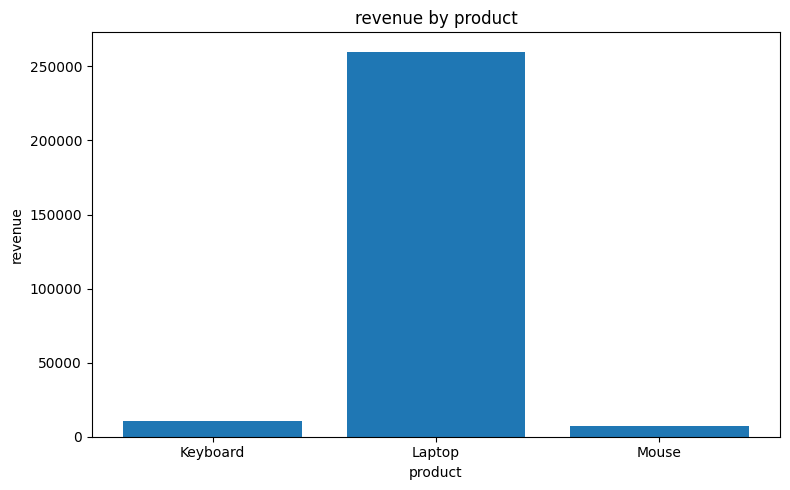

In [15]:
plt.figure(figsize= (8,5))
plt.bar(df['product'],df['revenue'])
plt.title("revenue by product")
plt.xlabel("product")
plt.ylabel("revenue")
plt.tight_layout()
plt.show()

In [16]:
conn.close()
print("database connection close")

database connection close
